<a href="https://colab.research.google.com/github/amoghpai17/Cardiovascular_Risk_prediction/blob/main/Cardiovascular_Risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -** Amogh Pai


# **Project Summary -**

Coronary Heart Disease (CHD) is a prevalent health condition that affects millions of people worldwide. In this analysis, we explore various risk factors that can lead to CHD and develop machine learning models to predict the likelihood of CHD in individuals.

The analysis begins by pre-processing the given dataset, which contains various demographic and medical attributes of patients. The dataset has several null values, which were handled by replacing them with mean values, and a single row with null values was dropped. To handle outliers, we used log transformation. Furthermore, to handle the imbalanced class, we applied Synthetic Minority Over-sampling Technique (SMOTE), which generates synthetic samples of the minority class.

The dataset was then analyzed to explore the relationship between different attributes and the risk of CHD. It was found that male patients had a higher risk of CHD compared to females. Male patients also smoked more than female patients in the dataset, which can contribute to the higher risk. The risk of heart disease was found to be higher between the ages of 48 and 63, indicating that age is an important risk factor. Additionally, people with heart rates between 60 and 100 were found to have a higher chance of CHD.

After pre-processing the dataset, we developed three machine learning models to predict the likelihood of CHD in individuals. The models used were Logistic Regression, KNearestNeighbors, and Random Forest Classifier. We performed hyperparameter tuning on all three models to get the best parameters and the best score. The Random Forest Classifier was found to have the highest accuracy score among all the models, i.e., 86.945%

The results of the analysis provide valuable insights into the factors that can contribute to the risk of CHD. These insights can be used to identify high-risk individuals and develop preventive measures. For example, male patients with a history of smoking who are between the ages of 48 and 63 and have heart rates between 60 and 100 may need to be monitored more closely. Additionally, the machine learning models developed in this analysis can be used to predict the likelihood of CHD in individuals, which can aid in developing personalized treatment plans.

In conclusion, this analysis provides insights into the risk factors that can lead to CHD and highlights the importance of data pre-processing and machine learning in predicting the likelihood of CHD. The results of the analysis can be used to develop preventive measures and personalized treatment plans, ultimately leading to better health outcomes for patients.

# **GitHub Link -**

https://github.com/amoghpai17/Cardiovascular_Risk_prediction

# **Problem Statement**


**Analysis to explore the various risk factors that can contribute to Coronary Heart Disease (CHD) and to develop machine learning models to predict the likelihood of CHD in individuals.**

# Business context

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [176]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [177]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cardiovascular_Risk_prediction/data_cardiovascular_risk.csv')

### Dataset First View

In [179]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [180]:
# Dataset Rows & Columns count
rows = df.shape[0]
columns = df.shape[1]
print(f'The dataset has {rows} rows and {columns} columns.')

The dataset has 3390 rows and 17 columns.


### Dataset Information

In [181]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [182]:
# Dataset Duplicate Value Count
mask = df.duplicated()
duplicate_count = mask.sum()
print(f'The dataset has {duplicate_count} duplicate rows.')

The dataset has 0 duplicate rows.


#### Missing Values/Null Values

In [183]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [184]:
df.isnull().values.sum()

510

<AxesSubplot:>

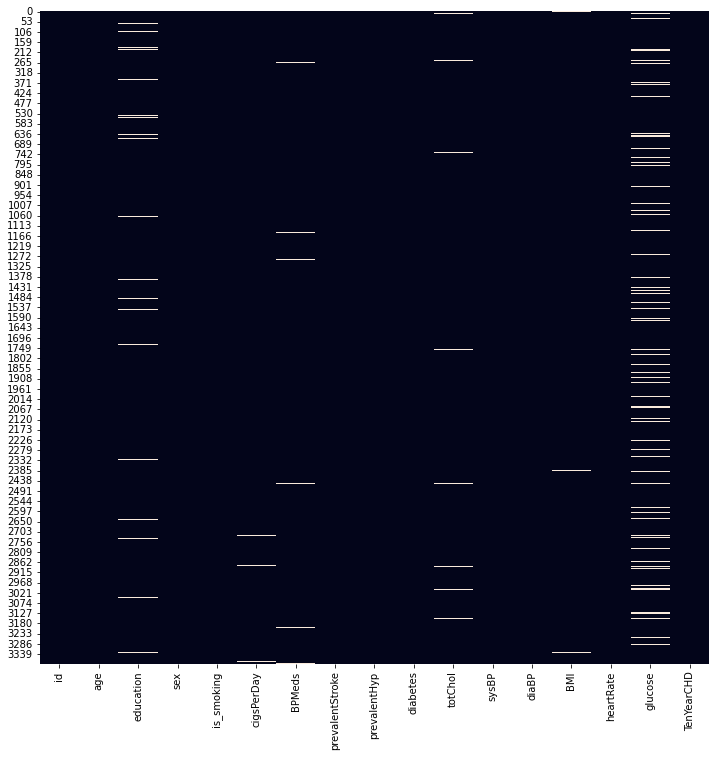

In [185]:
# Visualizing the missing values
plt.figure(figsize=(12,12))
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset contains 3390 rows and 17 columns.

The dataset has 510 null values and no Duplicate values.

The datatypes of features are object,int and float.

## ***2. Understanding Your Variables***

In [186]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [187]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

**Sex - Gender**

**Age- Age**

**is_smoking - whether smoking currently or not.** 

**cigs_Per_Day - Cigarettes smoked per day.**

**BP_Meds - Whether taking BP meds or not.** 
       
**prevalent Stroke - If the patient has a history of stroke**

**prevalent Hyp - If the patient has a history of hypertension**

**diabetes - Patient has diabetes or not**

**tot Chol - Cholesterol measure**

**sysBP - BP measure**
       
**diaBP - BP measure**

**BMI - Body Mass Index**

**heartRate - Heart Rate measure**



### Check Unique Values for each variable.

In [188]:
# Check Unique Values for each variable.
for col in df.columns:
    unique_values = df[col].nunique()
    print(col, unique_values)

id 3390
age 39
education 4
sex 2
is_smoking 2
cigsPerDay 32
BPMeds 2
prevalentStroke 2
prevalentHyp 2
diabetes 2
totChol 240
sysBP 226
diaBP 142
BMI 1259
heartRate 68
glucose 132
TenYearCHD 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [189]:
# Write your code to make your dataset analysis ready.
# Creating the list of variables for which distribution plot needs to be plotted
dist_col=['totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [190]:
#dropping the variables which are insignificant
df.drop(labels=['id','education'],inplace=True,axis=1)

In [191]:
#required for visualization purpose
df0=df.iloc[:,1:3]
df0['smoking']=df0['is_smoking'].apply (lambda x:0 if x=='NO' else 1 )
df_smoke=df0.groupby(['sex','is_smoking']).count()
df_smoke=df_smoke.reset_index()
df_smoke

,sex,is_smoking,smoking
0,F,NO,1147
1,F,YES,776
2,M,NO,556
3,M,YES,911


In [192]:
#required for visualization purpose
def heartRate_data(row):
    if row['heartRate'] <= 59:
        value = 'Low'
    elif row['heartRate'] < 100:
        value = 'Normal'
    else:
        value = "High"
    
    return value

In [193]:
df['heartRateLabel'] = df.apply(heartRate_data, axis = 1)

### What all manipulations have you done and insights you found?

I have done the necessary grouping for visualization purpose

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

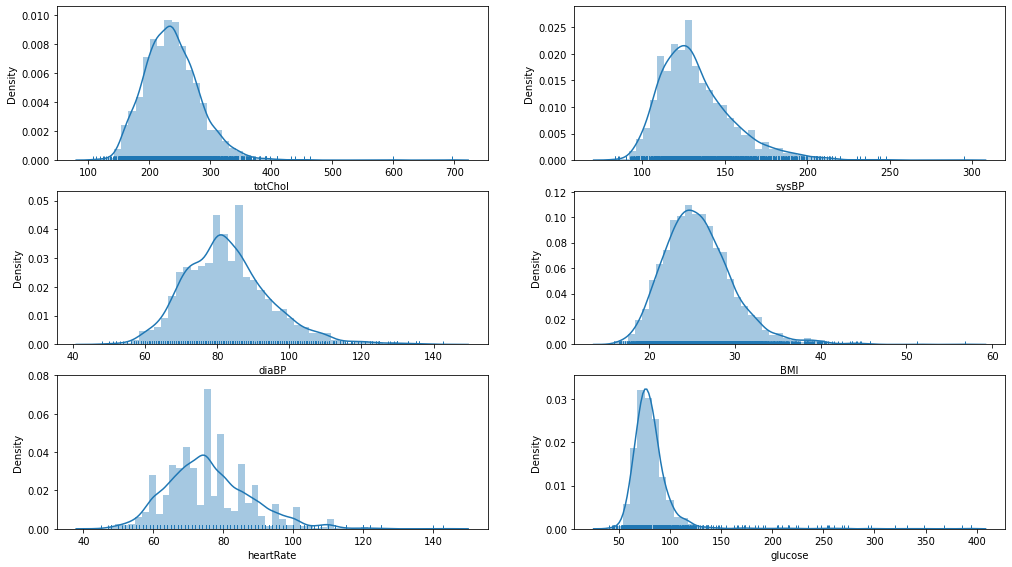

In [194]:
# Chart - 1 visualization code
dist_col=['totChol','sysBP','diaBP','BMI','heartRate','glucose']
plt.figure(figsize=(17,13))
for i in range(len(dist_col)):
    plt.subplot(4,2,i+1)
    sns.distplot(df[dist_col[i]], hist=True, rug=True)

##### 1. Why did you pick the specific chart?

A distribution plot, also known as a histogram, is a useful chart for exploring the distribution of a single variable. It displays the frequency of data points that fall within a set of equal ranges, or "bins." This can help reveal patterns in the data such as the presence of outliers, skewness, and the presence of multiple peaks.

##### 2. What is/are the insight(s) found from the chart?

The values are distributed symmetrically around the mean, with most of the values clustered around the mean and fewer values farther away from it. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the probability distribution can help a business make informed decisions about risk management, forecasting, and resource allocation. if the chart reveals a highly skewed distribution, it could indicate that the data is not representative of the population or that there are systemic issues that need to be addressed. 



#### Chart - 2

Text(0.5, 1.0, 'Count of people who have risk of CHD based on gender')

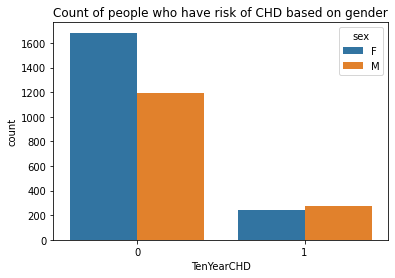

In [195]:
# Chart - 3 visualization code
# Count plot
sns.countplot(x='TenYearCHD',data=df,hue='sex')
plt.title('Count of people who have risk of CHD based on gender')

##### 1. Why did you pick the specific chart?

Easy to interpret: A bar chart is a simple and intuitive way to represent categorical data. The height of the bars provides an easy-to-understand visual representation of the data.

Effective comparison: A bar chart allows for easy comparison between different categories, in this case, different states. This can help identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

Male has higher risk of CHD as compared to Female. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight that males have a higher risk of CHD than females may not necessarily lead to a positive business impact, depending on the nature of the business. If the business is in the healthcare industry, such as a hospital or health insurance provider, this insight could lead to a positive impact by helping them target their resources towards men and create programs to prevent or manage CHD in men.

#### Chart - 3

Text(0.5, 1.0, 'Plot of people who smoke based on gender')

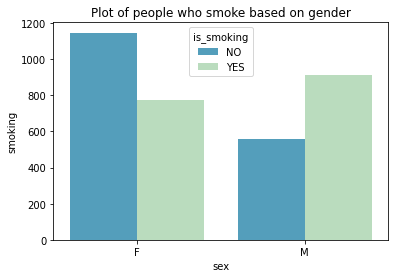

In [196]:
# Plot to see people who smoke more based on gender
sns.barplot(x="sex",
           y="smoking",
           hue="is_smoking",
           data=df_smoke,palette='GnBu_r')
plt.title('Plot of people who smoke based on gender')

##### 1. Why did you pick the specific chart?

Easy to interpret: A bar chart is a simple and intuitive way to represent categorical data. The height of the bars provides an easy-to-understand visual representation of the data.

Effective comparison: A bar chart allows for easy comparison between different categories, in this case, different states. This can help identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

Male patients smoke more compared to female patients in the given dataset

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight could potentially lead to negative growth if it is used to perpetuate harmful gender stereotypes or biases. For example, if a business were to use this insight to assume that all male employees smoke or are more likely to take smoking breaks, it could lead to discriminatory practices in the workplace that could harm morale and productivity.

Overall, it is important to use insights such as these in a responsible and ethical manner, and to consider their potential impact on different aspects of the business. While this particular insight may not directly lead to positive business impact in all cases, it can be used in conjunction with other data to develop effective strategies for promoting health and wellness.

#### Chart - 4

Text(0.5, 1.0, 'Plot of people who have Risk of heart rate based on age')

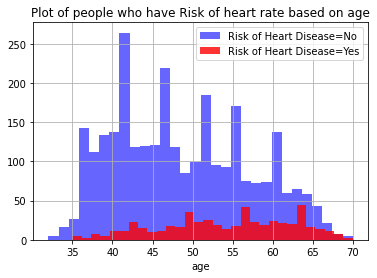

In [197]:
# Chart - 5 visualization code
#  Histogram Plot
df[df['TenYearCHD']==0]['age'].hist(bins=30,color='blue',label='Risk of Heart Disease=No',alpha=0.6)
df[df['TenYearCHD']==1]['age'].hist(bins=30,color='red',label='Risk of Heart Disease=Yes',alpha=0.8)
plt.legend()
plt.xlabel('age')
plt.title('Plot of people who have Risk of heart rate based on age')


##### 1. Why did you pick the specific chart?

It is a useful chart for exploring the distribution of a single variable. It displays the frequency of data points that fall within a set of equal ranges, or "bins." This can help reveal patterns in the data such as the presence of outliers, skewness, and the presence of multiple peaks.

##### 2. What is/are the insight(s) found from the chart?

The risk of heart disease is more between the age 48 to 63. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight that the risk of heart disease is higher between the ages of 48 to 63 could potentially have a positive business impact if the business is in the healthcare or wellness industry. For example, a health insurance company could use this information to create targeted marketing campaigns to individuals in this age group to encourage them to get regular check-ups, exercise regularly, and eat a healthy diet to reduce their risk of heart disease. This could lead to an increase in demand for healthcare services and products, which could have a positive impact on businesses in the healthcare industry.



#### Chart - 5

Text(0.5, 1.0, 'Plot of BP against Cholestrol')

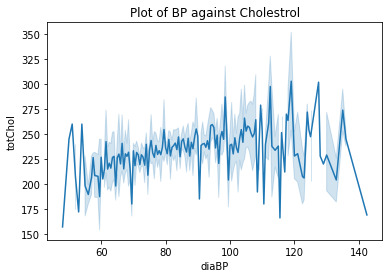

In [198]:
# Chart - 6 visualization code
sns.lineplot(data=df,x=df['diaBP'],y=df['totChol'])
plt.title('Plot of BP against Cholestrol')

##### 1. Why did you pick the specific chart?

A line plot can be a useful chart type for visualizing the relationship between two continuous variables like BP and cholesterol. By plotting each data point as a single point on the chart and connecting them with a line, a line plot can help show the overall trend in the data and identify any patterns or changes over time.

##### 2. What is/are the insight(s) found from the chart?

The graph  indicates that cholestrol level is not the sole deciding factor for predicting whether the person gets coronary heart disease or not. People with similar levels of cholestrol have got coronary heart disease as well as are free from coronary heart disease. Clearly, there is no direct correlation of coronary heart disease with the cholestrol level.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is possible that the insights could have a negative impact on the sales of cholesterol-lowering medications or devices, as the importance of cholesterol levels in predicting coronary heart disease may be less emphasized. However, it's important to note that these medications and devices may still be valuable in managing other health conditions related to cholesterol levels, such as high LDL cholesterol or familial hypercholesterolemia. Additionally, new treatments may be developed to target other risk factors identified through the more comprehensive risk assessment tools. Overall, the impact on business growth is difficult to predict and will likely depend on a range of factors.

#### Chart - 6

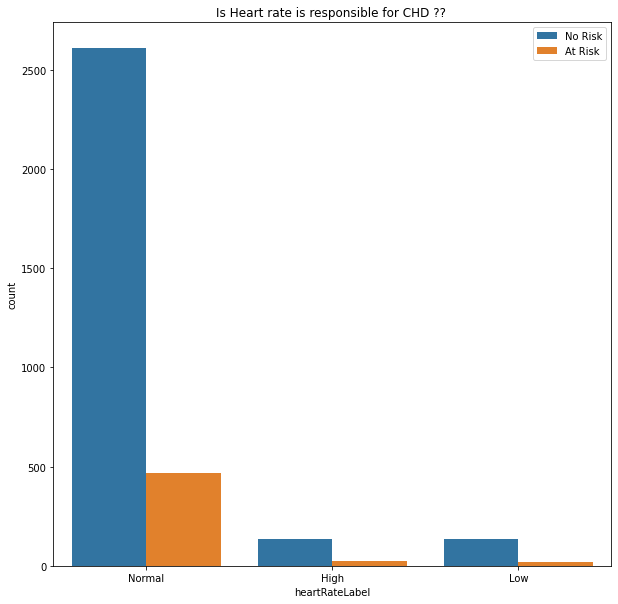

In [199]:
# Chart - 7 visualization code
plt.figure(figsize = (10,10))
sns.countplot(x = df['heartRateLabel'], hue = df['TenYearCHD'])
plt.title("Is Heart rate is responsible for CHD ?? ")
plt.legend(['No Risk','At Risk'])
plt.show()
     

##### 1. Why did you pick the specific chart?

Easy to interpret: A bar chart is a simple and intuitive way to represent categorical data. The height of the bars provides an easy-to-understand visual representation of the data.

Effective comparison: A bar chart allows for easy comparison between different categories, in this case, different states. This can help identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

people with more then 60 and less then 100 heart rate has higher chance of CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If the business is in the healthcare industry, this insight could potentially have a positive impact by allowing healthcare professionals to identify patients who are at higher risk for CHD and provide them with appropriate treatment and preventive measures to reduce their risk. If the business is in the fitness industry, this insight could potentially have a negative impact if it discourages people from exercising or pushing themselves too hard during exercise out of fear of increasing their heart rate. This could lead to a decrease in demand for fitness products or services and ultimately lead to negative growth. 

#### Chart - 7

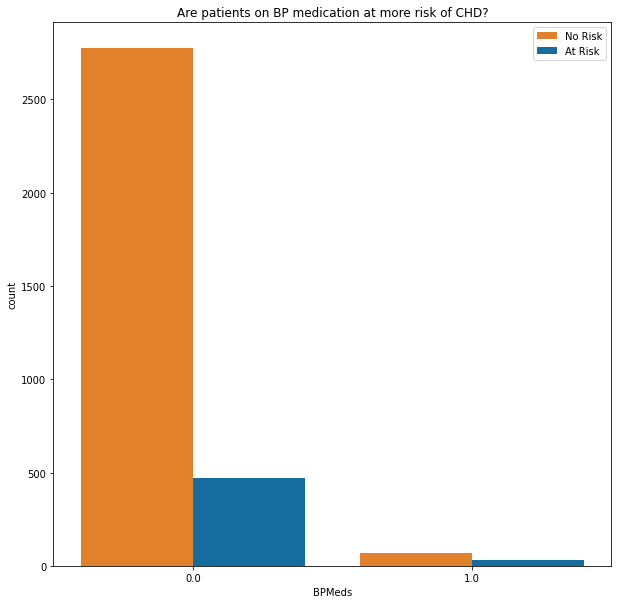

In [200]:
# Chart - 8 visualization code

my_palette = {0: '#ff7f0e', 1: '#0072b2'}
plt.figure(figsize=(10, 10))
sns.countplot(x=df['BPMeds'], hue=df['TenYearCHD'], palette=my_palette)
plt.title("Are patients on BP medication at more risk of CHD?")
plt.legend(['No Risk', 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

Easy to interpret: A bar chart is a simple and intuitive way to represent categorical data. The height of the bars provides an easy-to-understand visual representation of the data.

Effective comparison: A bar chart allows for easy comparison between different categories, in this case, different states. This can help identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

people with no BP medication are at more risk for CHD then people with BP medication. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight that people with no BP medication are at more risk for CHD than people with BP medication can potentially lead to a positive business impact for companies that develop and market BP medication. These companies may see an increase in demand for their products, resulting in increased revenue and growth.



#### Chart - 8 - Correlation Heatmap

<AxesSubplot:>

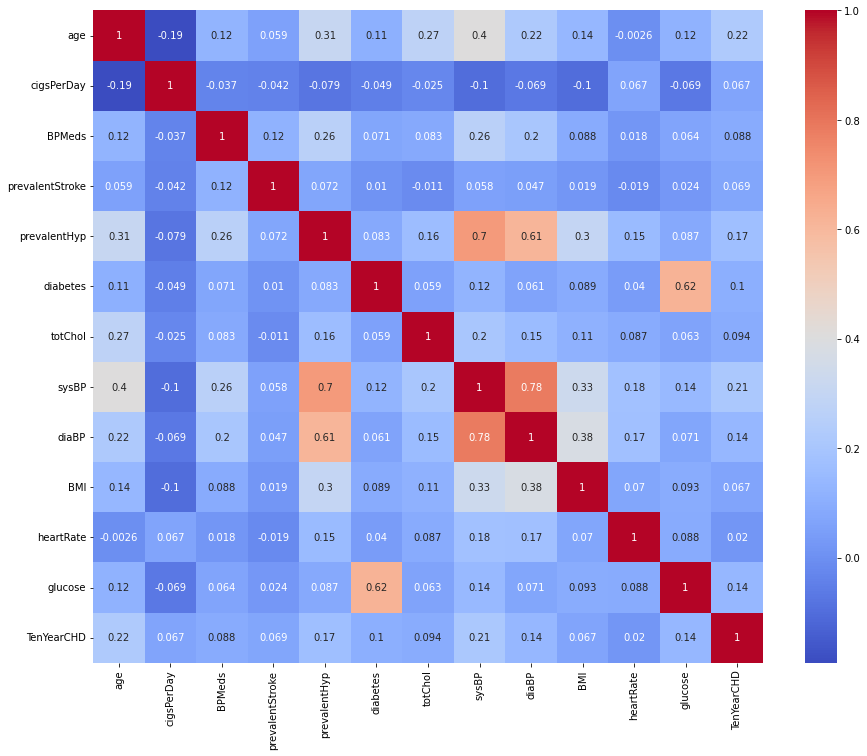

In [201]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,12))
correlation=df.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Correlation heatmaps help people identify which variables in a dataset are strongly or weakly correlated. By looking at the color-coded matrix, they can quickly identify which variables are positively or negatively correlated and to what degree.

##### 2. What is/are the insight(s) found from the chart?

diabetes and gulucose is positively correlated. sysBP and diaBP is also have positive correlation. 

#### Chart - 9 - Pair Plot 

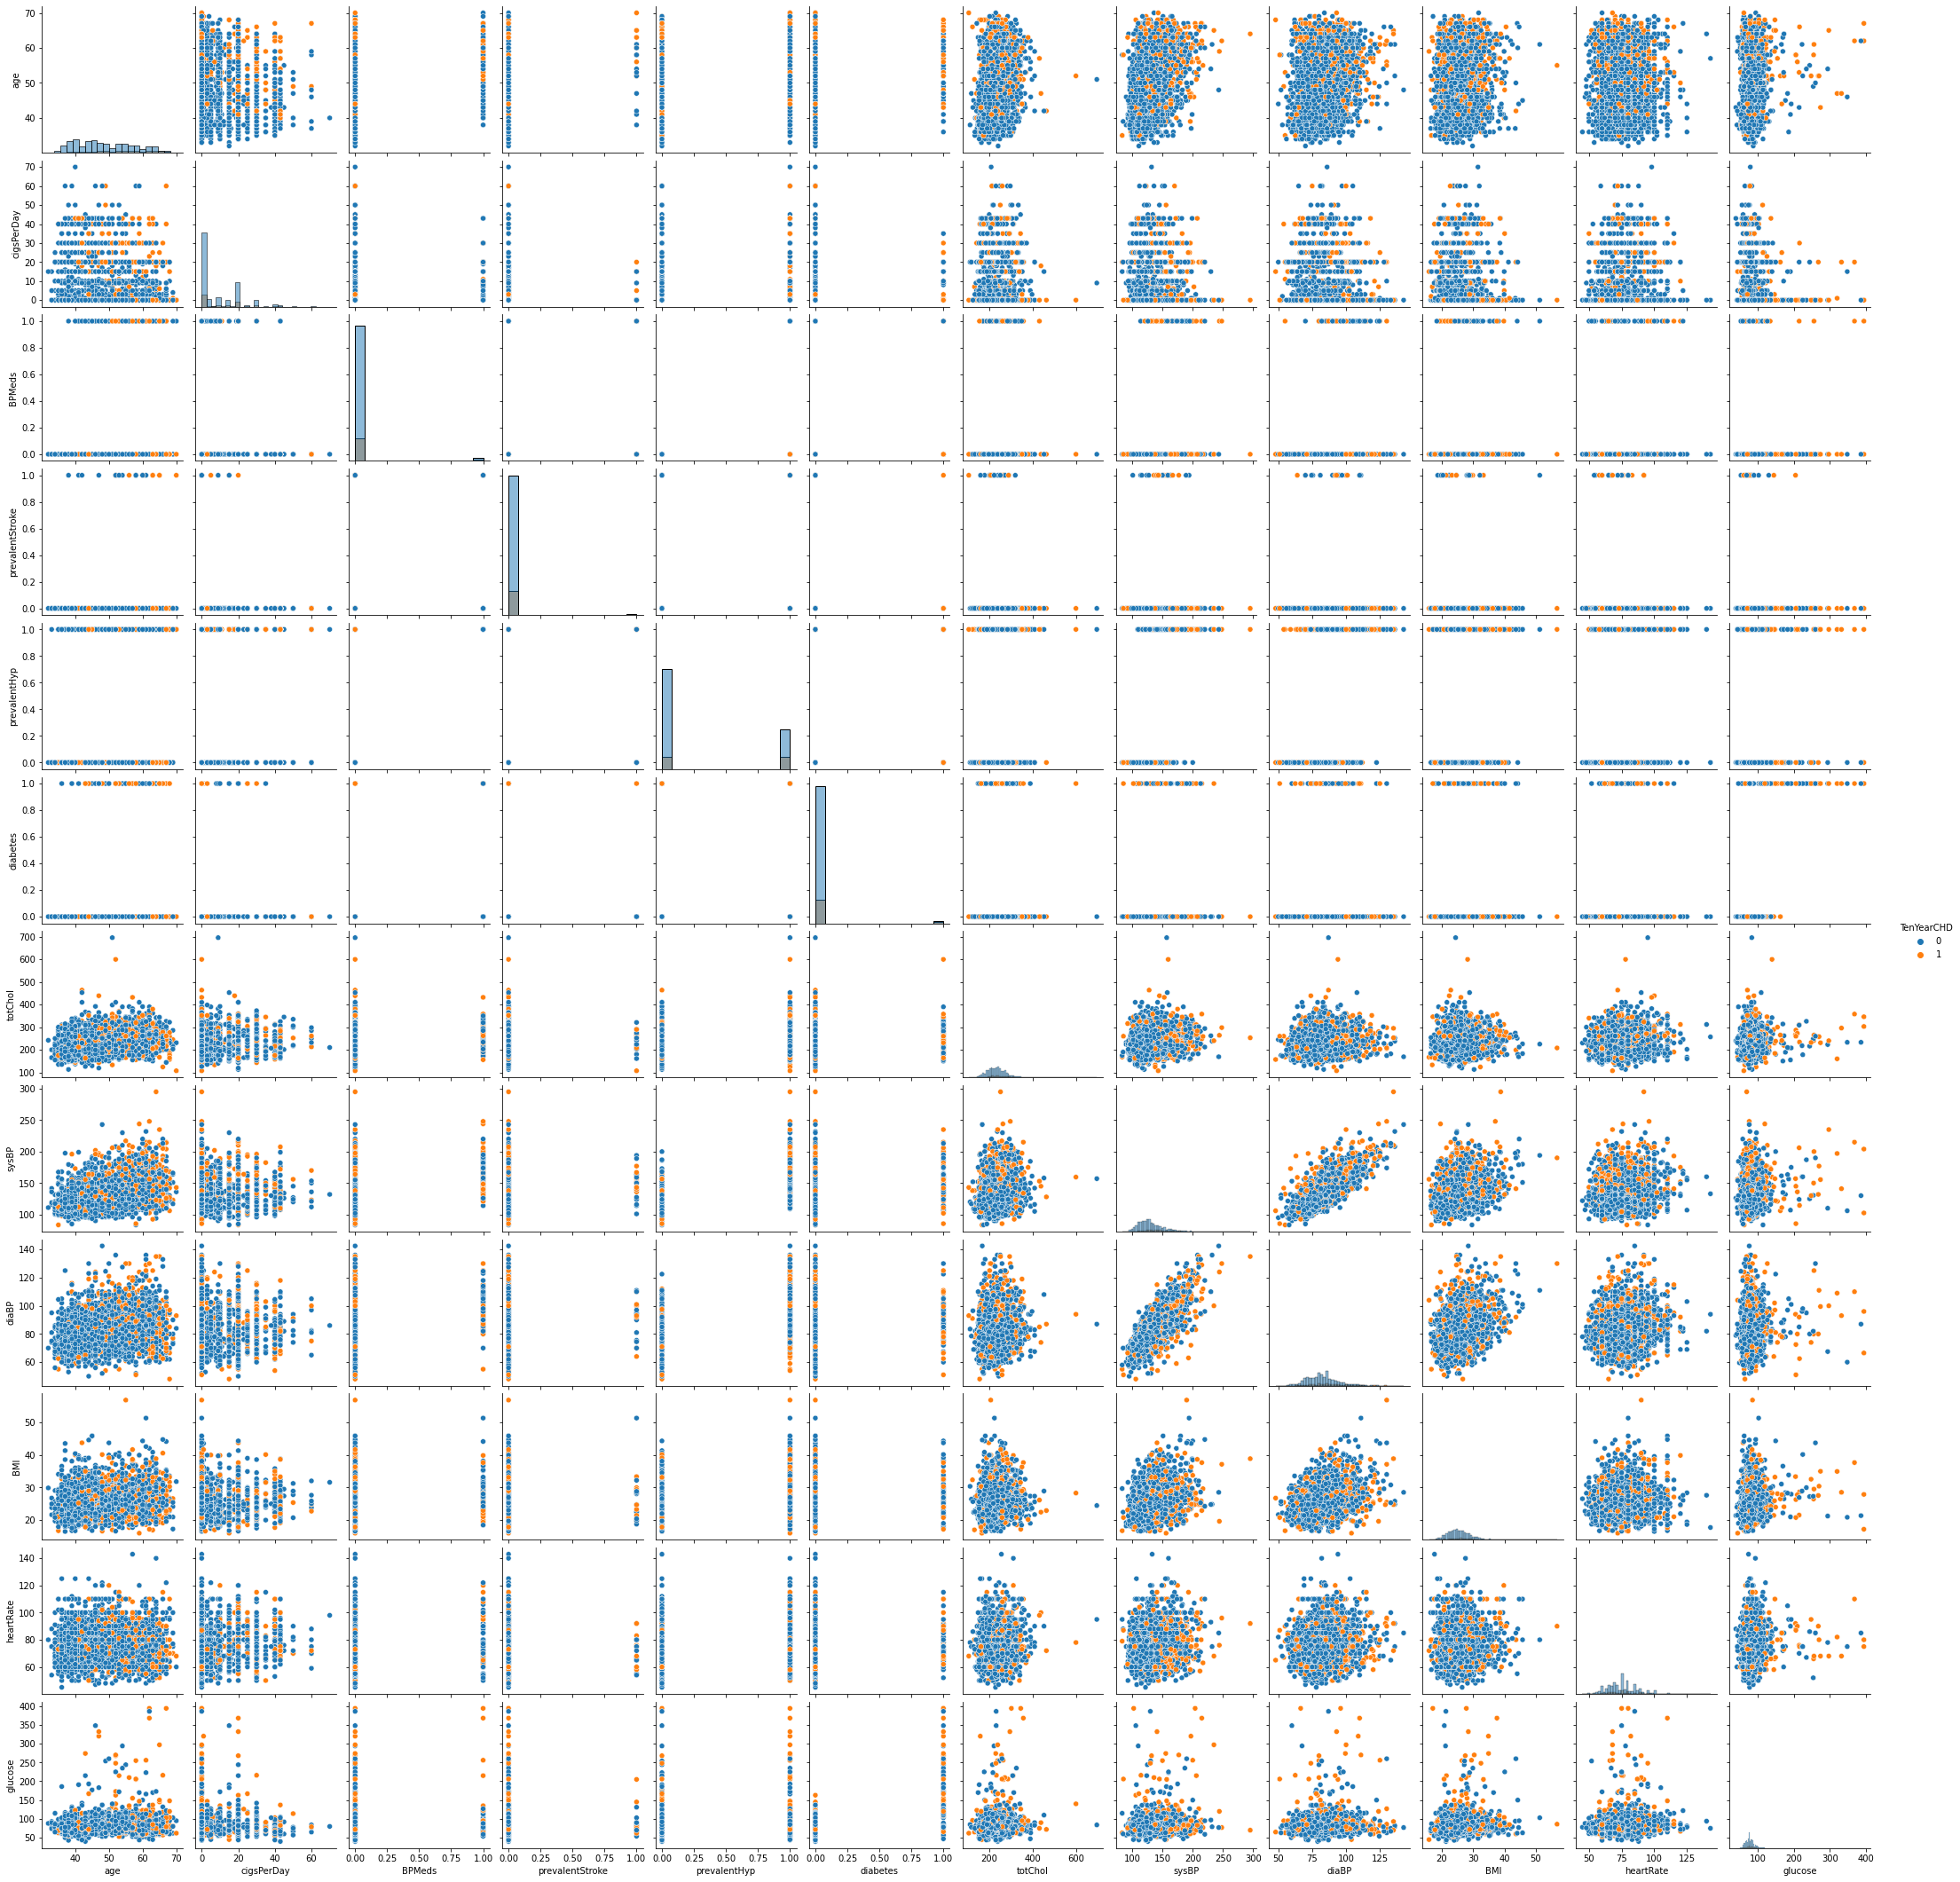

In [202]:
# Pair Plot visualization code
sns.pairplot(df, hue='TenYearCHD', diag_kind='hist')

##### 1. Why did you pick the specific chart?

Pairplots can help identify correlations between different variables in a dataset. Correlated variables are plotted close together on the diagonal of the pairplot, and can indicate a positive or negative correlation between the variables.

Pairplots are a useful way to visualize high-dimensional data by reducing the dimensionality of the data to two dimensions. This can make it easier to identify patterns and relationships between variables in the data.

##### 2. What is/are the insight(s) found from the chart?


diabetes and gulucose is positively correlated. sysBP and diaBP is also have positive correlation.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement 1: There is a significant difference in the average age between individuals who develop cardiovascular disease (CHD) and those who do not.

Statement 2: There is a significant association between smoking and the development of cardiovascular disease.

Statement 3: There is a positive correlation between BMI and systolic blood pressure.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no significant difference in the average age between individuals who develop CHD and those who do not.

Alternative hypothesis: There is a significant difference in the average age between individuals who develop CHD and those who do not.

#### 2. Perform an appropriate statistical test.

In [203]:
# Perform Statistical Test to obtain P-Value
chd_age = df[df['TenYearCHD'] == 1]['age']
no_chd_age = df[df['TenYearCHD'] == 0]['age']
t_stat, p_val = ttest_ind(chd_age, no_chd_age, equal_var=False)

if p_val < 0.05:
    print("Reject null hypothesis.")
else:
    print("Accept null hypothesis.")

Reject null hypothesis.


##### Which statistical test have you done to obtain P-Value?

I have used Two-sample t-test assuming unequal variances

##### Why did you choose the specific statistical test?

 This test is appropriate because we are comparing the means of two independent groups (individuals who develop CHD and those who do not), and we do not know the population variances of the two groups.


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no significant association between smoking and the development of cardiovascular disease.

Alternative hypothesis: There is a significant association between smoking and the development of cardiovascular disease.

#### 2. Perform an appropriate statistical test.

In [204]:
# Perform Statistical Test to obtain P-Value
smoking_chd = pd.crosstab(df['is_smoking'], df['TenYearCHD'])
chi2_stat, p_val, dof, expected = chi2_contingency(smoking_chd)

if p_val < 0.05:
    print("Reject null hypothesis.")
else:
    print("Accept null hypothesis.")

Accept null hypothesis.


##### Which statistical test have you done to obtain P-Value?

I have used Chi-square test.

##### Why did you choose the specific statistical test?

This test is appropriate because we are testing for independence between two categorical variables (smoking and the development of CHD).

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no correlation between BMI and systolic blood pressure.

Alternative hypothesis: There is a positive correlation between BMI and systolic blood pressure.

#### 2. Perform an appropriate statistical test.

In [205]:
# Perform Statistical Test to obtain P-Value
df.replace([np.inf, -np.inf], np.nan, inplace=True) # replace infinite values with NaN
df.dropna(subset=['BMI', 'sysBP'], inplace=True) # remove rows with missing values

corr_coef, p_val = pearsonr(df['BMI'], df['sysBP'])

if p_val < 0.05:
    print("Reject null hypothesis.")
else:
    print("Accept null hypothesis.")

Reject null hypothesis.


##### Which statistical test have you done to obtain P-Value?

I have used Pearson correlation coefficient test.

##### Why did you choose the specific statistical test?

This test is appropriate because we are testing the strength of the linear relationship between two continuous variables (BMI and systolic blood pressure) and whether the correlation is positive or not.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [206]:
# Handling Missing Values & Missing Value Imputation
#storing the variable which have null values
nullcol=['cigsPerDay','BPMeds','totChol','BMI','glucose']

In [207]:
#Treating the null values by applying statistic mean over them 
for x in nullcol:
  df[x].fillna(df[x].mean(), inplace=True)

In [208]:
#dropping the single row which had null value
df.dropna(subset = ["heartRate"], inplace=True)

In [209]:
df.isnull().values.sum()

0

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have used two missing value imputation techniques:

1-Imputing the missing values with the mean of the column:
 
 This technique replaces the missing values with the mean value of the column. It is a common technique used for numerical data with missing values, as it can preserve the overall distribution of the data.

2-Dropping rows with missing values:

This technique drops all rows that have missing values in the specified column(s). This technique is often used when the missing values are relatively few and dropping them does not significantly impact the analysis. However, it should be used with caution, as it can lead to a loss of information.

### 2. Handling Outliers

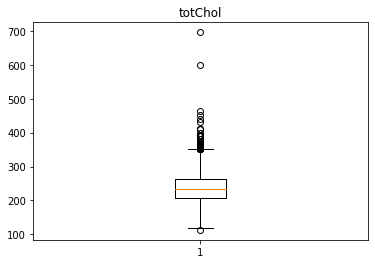

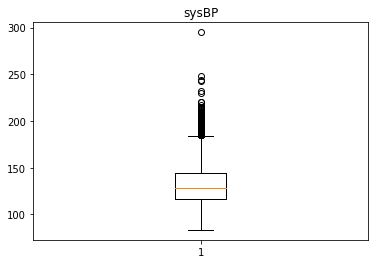

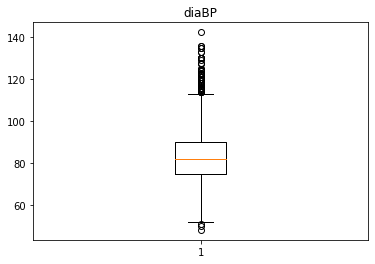

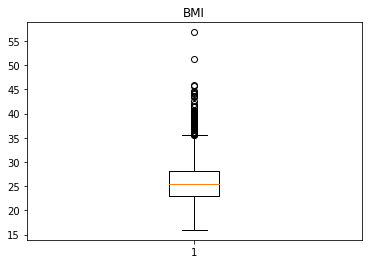

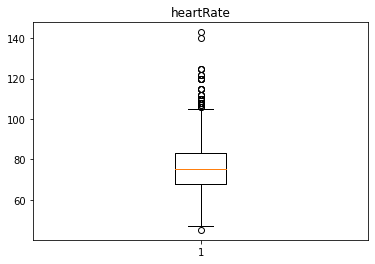

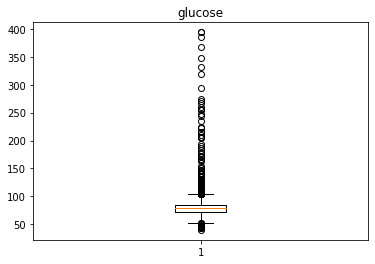

In [210]:
# Handling Outliers & Outlier treatments
# Select the numerical columns
num_cols = ['totChol','sysBP','diaBP','BMI','heartRate','glucose']

# Create box plots for each numerical column
for col in num_cols:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [211]:
cols_to_check = ['totChol','sysBP','diaBP','BMI','heartRate','glucose']

for col in cols_to_check:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers found")

totChol: 42 outliers found
sysBP: 103 outliers found
diaBP: 58 outliers found
BMI: 77 outliers found
heartRate: 64 outliers found
glucose: 213 outliers found


In [212]:
#applying log tranformation on the data to remove outliers
for i in num_cols:
    df[i]=np.log10(df[i]+1)


##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used Log transformation outlier treatment techniques:

Log transformation: The log transformation is a common technique used to reduce the influence of extreme values (outliers) in data. The transformation is applied to the data to reduce the skewness of the distribution and make it more symmetric. This transformation is suitable for data where the values are positively skewed or have a long tail.



### 3. Categorical Encoding

In [213]:
# Encode your categorical columns
#Label encoding using lambda function
df['sex']=df['sex'].apply(lambda x:0 if x=='F' else 1)
df['is_smoking']=df['is_smoking'].apply(lambda x:0 if x=='NO' else 1)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Binary encoding: The code df['sex']=df['sex'].apply(lambda x:0 if x=='F' else 1) is using binary encoding to encode the categorical variable 'sex'. Here, female is assigned a value of 0 and male is assigned a value of 1. This is a simple and effective encoding technique for binary variables.

Label encoding: The code df['is_smoking']=df['is_smoking'].apply(lambda x:0 if x=='NO' else 1) is using label encoding to encode the categorical variable 'is_smoking'. Here, 'NO' is assigned a value of 0 and 'YES' is assigned a value of 1. Label encoding assigns a unique numerical label to each category in the variable, which is useful for variables with multiple categories.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [214]:
# Manipulate Features to minimize feature correlation and create new features
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df[['age','sex','is_smoking','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']], df['TenYearCHD'])

In [215]:
#Creating a new Oversampled Data Frame
newdf = pd.DataFrame(X,columns = ['age','sex','is_smoking','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose'])
newdf['TenYearCHD']=y



<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

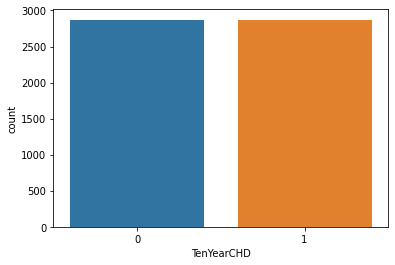

In [216]:
#to check the balance of data using countplot
sns.countplot(newdf['TenYearCHD'])

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

NO, dataset does't required transformation.

### 6. Data Scaling

In [217]:
#preparing the data to scale down
newdf.pop(item='TenYearCHD')

0       0
1       0
2       1
3       0
4       1
       ..
5739    1
5740    1
5741    1
5742    1
5743    1
Name: TenYearCHD, Length: 5744, dtype: int64

In [218]:
# Scaling your data
#applying StandardScalar 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [219]:
df=ss.fit_transform(newdf)
df=pd.DataFrame(df,columns=['age','sex','is_smoking','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose'])

In [220]:
df['TenTearCHD']=y

##### Which method have you used to scale you data and why?

I have used the StandardScaler method to scale my data.By using StandardScaler, we can reduce the impact of outliers and ensure that the data is comparable across different features. Additionally, many machine learning algorithms require standardized data as a preprocessing step, making StandardScaler a useful method to use.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No need of Dimensionality reduction for the dataset. This techniques are commonly used to reduce the number of features in a dataset.As, there is less number of features in our dataset we dont need dimensionality reduction.

### 8. Data Splitting

In [221]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [223]:
# Split your data to train and test. Choose Splitting ratio wisely.
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=5)

##### What data splitting ratio have you used and why? 

As a rule of thumb, a commonly used splitting ratio is 80:20, which means that 80% of the data is used for training and 20% for testing. This ratio is a good starting point for most cases as it allows for a sufficient amount of data to train the model while still having a reasonable amount of data to test and evaluate its performance.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

As we have seen in Data Vizualization The data in dataset are equally distributed among seasons making the dataset a balanced dataset.

In [ ]:
# Handling Imbalanced Dataset (If needed)

## ***7. ML Model Implementation***

### ML Model - 1 Logistic Regression Model

In [224]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [225]:
# Fit the Algorithm
lr.fit(xtrain,ytrain)


LogisticRegression()

In [226]:
# Predict on the model
predict=lr.predict(xtest)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [227]:
# Visualizing evaluation Metric Score chart
#Evaluating the logistic regression using the metrics
print ("The accuracy of Logistic Regression is : ", accuracy_score(ytest, predict)*100, "%")
print ("The precision of Logistic Regression is : ", precision_score(ytest, predict)*100, "%")
print ("The recall of Logistic Regression is : ", recall_score(ytest, predict)*100, "%")

The accuracy of Logistic Regression is :  65.53524804177546 %
The precision of Logistic Regression is :  66.43356643356644 %
The recall of Logistic Regression is :  65.06849315068493 %


In [228]:
print("The confusion matrix of Logistic Regression is:\n",confusion_matrix(ytest,predict))

The confusion matrix of Logistic Regression is:
 [[373 192]
 [204 380]]


#### 2. Cross- Validation & Hyperparameter Tuning

In [229]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Hyper parameter tunning
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=5)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)


In [230]:
# Fit the Algorithm
grid_result = grid_search.fit(xtrain,ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.664118 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [231]:
# Predict on the model
optimal_logistic=grid_result.best_estimator_
op_train_pred=optimal_logistic.predict(xtrain)
op_test_pred=optimal_logistic.predict(xtest)

In [232]:
print('Accuracy of train data:',accuracy_score(op_train_pred,ytrain))
print('Accuracy of test data:',accuracy_score(op_test_pred,ytest))
print('Accuracy of test data:',recall_score(op_test_pred,ytest))

Accuracy of train data: 0.6661588683351469
Accuracy of test data: 0.6527415143603134
Accuracy of test data: 0.6642984014209592


##### Which hyperparameter optimization technique have you used and why?

I have used Grid Search as the hyperparameter optimization technique.
The reason for choosing Grid Search as the optimization technique may be because it is a simple and reliable method that can be used to tune hyperparameters for a wide range of models. It is also easier to interpret and visualize the results of Grid Search, making it an effective way to find the optimal hyperparameters for a given model.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement in the accuracy after applying hyperparameters.

Before Hyperparameters:

Accuracy: 65.535%

Precision: 66.433%

Recall: 65.068%

After Hyperparameters:

Accuracy of train data: 66.616%

Accuracy of test data: 65.274%

Accuracy of validation data: 66.430%

### ML Model - 2 KNearestNeigbors Model

In [233]:
# ML Model - 2 Implementation
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier


neighbors = np.arange(1,12)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(xtrain, ytrain)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(xtrain, ytrain)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(xtest, ytest) 

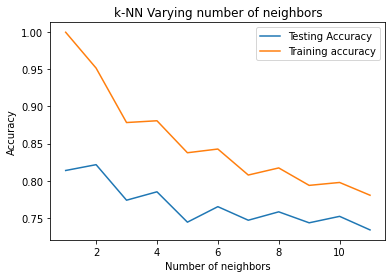

In [234]:
# Generate the plot between test accuracy and train accuracy to determine k value
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [235]:
#Fitting the model
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=9)

In [236]:
y_pred = knn.predict(xtest)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [237]:
# Visualizing evaluation Metric Score chart
#Evaluating the KNN model using the metrics
print("The accuracy of KNN model is :",knn.score(xtest,ytest)*100,"%")
print("The recall of KNN model is :",recall_score(ytest,y_pred)*100,'%')
print("The precision of KNN model is :",precision_score(ytest,y_pred)*100,'%')

The accuracy of KNN model is : 74.325500435161 %
The recall of KNN model is : 85.1027397260274 %
The precision of KNN model is : 70.49645390070923 %


#### 2. Cross- Validation & Hyperparameter Tuning

In [238]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'n_neighbors': np.arange(13, 20)}

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Create a GridSearchCV object
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
knn_cv.fit(xtrain, ytrain)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([13, 14, 15, 16, 17, 18, 19])})

In [239]:
# Fit the GridSearchCV object to the training data
knn_cv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([13, 14, 15, 16, 17, 18, 19])})

In [240]:
# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", knn_cv.best_params_)
print("Best accuracy:", knn_cv.best_score_)



Best hyperparameters: {'n_neighbors': 14}
Best accuracy: 0.7129488574537541


In [241]:
# Use the best model to make predictions on the test data
y_pred = knn_cv.predict(xtest)



In [242]:
# Evaluate the accuracy of the best model
accuracy = accuracy_score(ytest, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.7293298520452568


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization. GridSearchCV is a simple and effective technique for hyperparameter tuning that exhaustively searches over a specified hyperparameter space and evaluates the model performance using cross-validation. It works by testing all possible combinations of hyperparameter values specified in a grid, and selecting the combination that yields the best performance metric, such as accuracy score, based on the cross-validation results.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, there is no improvement in the accuracy of the KNN model after applying hyperparameters. In fact, there is a slight decrease in the accuracy.


Before Hyperparameters:

Accuracy: 74.325%

Precision: 70.496%

Recall: 85.103%

After Hyperparameters:

Test accuracy: 72.933%

### ML Model - 3 Random Forest Classifier

In [243]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier object
rfc = RandomForestClassifier(random_state=42)

# Fit the Random Forest Classifier object to the training data
rfc.fit(xtrain, ytrain)

# Use the trained model to make predictions on the test data
y_pred = rfc.predict(xtest)



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [244]:
# Visualizing evaluation Metric Score chart
# Evaluate the accuracy of the model
accuracy = accuracy_score(ytest, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.8694516971279374


#### 2. Cross- Validation & Hyperparameter Tuning

In [245]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200 ],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}



In [246]:
# Create a Random Forest Classifier object
rfc = RandomForestClassifier(random_state=42)



In [247]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(xtrain, ytrain)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [248]:
# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)



Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [249]:
# Use the best hyperparameters to fit the Random Forest Classifier object to the training data
rfc = RandomForestClassifier(random_state=42, **grid_search.best_params_)
rfc.fit(xtrain, ytrain)



RandomForestClassifier(max_depth=15, n_estimators=200, random_state=42)

In [250]:
# Use cross-validation to evaluate the model
cv_accuracy = cross_val_score(rfc, xtrain, ytrain, cv=5)
print("Cross-validation accuracy:", cv_accuracy.mean())



Cross-validation accuracy: 0.8309031556039173


In [251]:
# Use the trained model to make predictions on the test data
y_pred = rfc.predict(xtest)



In [252]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(ytest, y_pred)
print("Test accuracy:", accuracy)


Test accuracy: 0.8546562228024369


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization. GridSearchCV is a technique that exhaustively searches over a specified range of hyperparameters to find the best combination of hyperparameters that optimizes the performance of the model.

I chose GridSearchCV because it is a simple and effective way to search for the best hyperparameters for a given model. It is also easy to implement and provides a convenient way to evaluate the model using cross-validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, there is no improvement in the accuracy of the RandomForestClassifier model after applying hyperparameters. In fact, there is a slight decrease in the accuracy.

Before Hyperparameters:

Test accuracy: 86.945%

After Hyperparameters:

Test accuracy: 85.466%

As we can see, the test accuracy has decreased slightly after applying hyperparameters. This suggests that the hyperparameters used may not be optimal for this particular dataset and model. It may be necessary to explore other hyperparameters or optimization techniques to improve the performance of the RandomForestClassifier model on this dataset.







### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have used Accuracy Evaluation metrics. This metric measures the overall correctness of the model's predictions. In many cases, accuracy is a critical metric for businesses, especially in cases where the cost of incorrect predictions is high.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I would choose Random Forest Classifier for final predition because it have perforem well among all 3 models. 

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Random Forest Classifier:**

Random Forest Classifier is an ensemble learning algorithm that builds multiple decision trees and merges them together to improve the model's performance and reduce overfitting. Each decision tree is trained on a randomly sampled subset of the training data, and each tree votes on the final classification. In this way, the Random Forest Classifier can handle both categorical and numerical data, and it can also handle missing data.

To explain the feature importance of Random Forest Classifier, we can use the feature importance tool available in the scikit-learn library. This tool computes the feature importance based on the Gini impurity, which measures how well a feature splits the data into different classes. The higher the Gini importance, the more important the feature is for the classification.

**Logistic Regression:**

Logistic Regression is a statistical method used for binary classification problems. It works by estimating the probability of an input belonging to a particular class. Logistic Regression is a linear model, which means it assumes a linear relationship between the input features and the output variable.

**KNN Classifier:**

KNN (K-Nearest Neighbor) Classifier is a simple and intuitive classification algorithm that works by finding the K nearest neighbors to a given data point and assigning it to the class that appears most frequently among those neighbors. The choice of K is a hyperparameter that needs to be tuned based on the data and problem.


# **Conclusion**

1 -Null values in the dataset were handled by replacing them with mean  values, and one row with null values was dropped.

2 -Male patients were found to have a higher risk of CHD compared to females.

3 -Male patients also smoked more than female patients in the dataset.

4 -The risk of heart disease was found to be higher between the ages of 48 and 63.

5 -People with heart rates between 60 and 100 also had a higher chance of CHD.

6 -Outliers were treated using log transformation.

7 -The imbalanced class was handled by applying SMOTE technique.

8 -Data was scaled using StandardScaler.

9 -Three machine learning models were applied to the dataset: Logistic Regression, KNearestNeighbors, and Random Forest Classifier.

10 -Hyperparameter tuning was performed on all three models to get the best parameters and the best score.

11-The Random Forest Classifier was found to have the highest accuracy score among all the models, i.e.,86.945%

12-The analysis provides insights into various factors that can influence the risk of CHD, which can be useful in identifying high-risk individuals and implementing preventive measures.

13 -Machine learning models can aid in predicting the likelihood of CHD in individuals and assist in developing personalized treatment plans.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***